<a href="https://colab.research.google.com/github/noh-yujeong/SPARTACODING_education_content/blob/main/4%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='yujeongnoh'
os.environ['KAGGLE_KEY']='f1f98ae96b1b8d5a2f0bcee2be4fd59e'

In [ ]:
#1. 데이터 셋 다운로드하기
!kaggle datasets download -d moltean/fruits
!unzip -q fruits.zip

 97% 737M/760M [00:07<00:00, 148MB/s]
100% 760M/760M [00:07<00:00, 110MB/s]


In [ ]:
#2. 필요한 Package importing하기
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#3. 전처리
### 폴더에서 직접 데이터를 가져와서 증강기법까지 써보기###

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


test_datagen=ImageDataGenerator(
    rescale=1./255
)

train_gen=train_datagen.flow_from_directory(
    'fruits-360/Training',
    target_size=(224,224),
    batch_size=32,
    seed=2021,
    class_mode='categorical',
    shuffle=True
)

test_gen=test_datagen.flow_from_directory(
   'fruits-360/Test',
    target_size=(224,224),
    batch_size=32,
    seed=2021,
    class_mode='categorical',
    shuffle=False
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

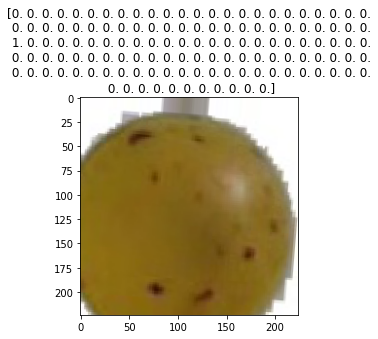

In [ ]:
#4. data 확인

from pprint import pprint

pprint(train_gen.class_indices)

preview_batch=train_gen.__getitem__(0)
preview_imgs, preview_labels=preview_batch

plt.title(str(preview_labels[0]))
plt.imshow(preview_imgs[0])

In [ ]:
#5. 전이학습(모델가져와서 수정)

from tensorflow.keras.applications.inception_v3 import InceptionV3

input=Input(shape=(224,224,3))

base_model=InceptionV3(weights='imagenet',include_top=False,input_tensor=input,pooling='max')

x=base_model.output
x=Dropout(rate=0.25)(x)
x=Dense(256,activation='relu')(x)
output=Dense(131,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])


87916544/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#6. 모델 학습
from tensorflow.keras.callbacks import ModelCheckpoint

history=model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=20,
    callbacks=[
               ModelCheckpoint('model.h5',monitor='val_acc',verbose=1,save_best_only=True)
    ]
)

Epoch 1/20
2116/2116 [==============================] - 982s 445ms/step - loss: 0.7789 - acc: 0.7931 - val_loss: 0.7946 - val_acc: 0.7761

Epoch 00001: val_acc improved from -inf to 0.77609, saving model to model.h5
Epoch 2/20
1951/2116 [==========================>...] - ETA: 1:08 - loss: 0.1595 - acc: 0.9507

In [ ]:
# 학습된 모델 로딩

from tensorflow.keras.models import load_model
model=load_model('model.h5')


In [ ]:
#결과 확인

test_imgs, test_labels=test_gen.__genitem__(100)
y_pred=model.predict(test_imgs)
classes=dict((v,k) for k,v in test_gen.class_indices.items())

fig,axes=plt.subplots(4,8,figsize=(20,12))

for img,test_label,pred_label,ax in zip(tesst_imgs,test_labels,y_pred,axes.flatten()):
  test_label=classes[np.argmax(test_label)]
  pred_label=classes[np.argmax(prd_label)]

  ax.set_title('GT:%s\nPR:%s'%(test_label,pred_label))
  ax.imshow(img)